In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1
680,5.0,10.0,NaN,NaN,NaN,10.0,5.0,NaN,3
681,1.0,NaN,1.0,3.0,NaN,NaN,NaN,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	33
float64		column 2	66
float64		column 3	235
float64		column 4	132
float64		column 5	235
float64		column 6	136
float64		column 7	202
float64		column 8	165
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,650.000000,617.000000,448.000000,551.000000,448.000000,547.000000,481.000000,518.000000,683.000000
mean,4.364615,3.074554,2.886161,2.626134,3.051339,3.376600,3.257796,2.681467,1.603221
std,2.795712,3.016882,2.738079,2.678868,2.110917,3.563763,2.322011,2.925391,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

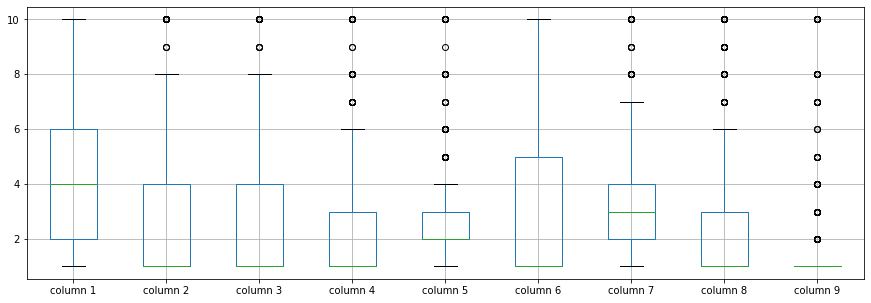

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.364615
column 2    3.074554
column 3    2.886161
column 4    2.626134
column 5    3.051339
column 6    3.376600
column 7    3.257796
column 8    2.681467
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.610991,0.634574,0.418063,0.487651,0.546427,0.512782,0.488242,0.328323
column 2,0.610991,1.000000,0.899322,0.695972,0.748829,0.680785,0.734517,0.707252,0.461392
column 3,0.634574,0.899322,1.000000,0.665000,0.729404,0.703294,0.736780,0.708796,0.456759
column 4,0.418063,0.695972,0.665000,1.000000,0.574165,0.629578,0.593285,0.611789,0.449754
column 5,0.487651,0.748829,0.729404,0.574165,1.000000,0.544620,0.574502,0.608435,0.482748
column 6,0.546427,0.680785,0.703294,0.629578,0.544620,1.000000,0.617997,0.538544,0.318180
column 7,0.512782,0.734517,0.736780,0.593285,0.574502,0.617997,1.000000,0.585569,0.279400
column 8,0.488242,0.707252,0.708796,0.611789,0.608435,0.538544,0.585569,1.000000,0.436422
column 9,0.328323,0.461392,0.456759,0.449754,0.482748,0.318180,0.279400,0.436422,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+89,9+89+89,9+89+89,9+89+89+89+89,9+89+89+89+89+89,9+89+89+89+89+89+89,9+89+89+89+89+89,9+89+89+89+89,9+89+89+89,9+89+89,9+89,9], vae_layer = False, seed = 890)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.860446475801012
Epoch: 1 , loss: 27.673731031871977
Epoch: 2 , loss: 26.505731173924037
Epoch: 3 , loss: 25.966121355692547
Epoch: 4 , loss: 25.8980226062593
Epoch: 5 , loss: 25.609458423796156
Epoch: 6 , loss: 25.473255793253582
Epoch: 7 , loss: 25.258166403997514
Epoch: 8 , loss: 25.03234999520438
Epoch: 9 , loss: 24.7305722009568
Epoch: 10 , loss: 24.737241517929803
Epoch: 11 , loss: 24.33246394566127
Epoch: 12 , loss: 23.91685117994036
Epoch: 13 , loss: 23.975255648295086
Epoch: 14 , loss: 23.5248601096017
Epoch: 15 , loss: 23.15852605728876
Epoch: 16 , loss: 23.340219497680664
Epoch: 17 , loss: 22.731375898633683
Epoch: 18 , loss: 22.387406984965008
Epoch: 19 , loss: 22.33431679861886
Epoch: 20 , loss: 22.31020552771432
Epoch: 21 , loss: 22.095654305957613
Epoch: 22 , loss: 21.90571319489252
Epoch: 23 , loss: 22.07866296314058
Epoch: 24 , loss: 21.80069773537772
Epoch: 25 , loss: 21.607970237731

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
679,0.000000,0.000000,1.786615,0.000000,0.962602,0.00000,0.294146,1.503088,0
680,0.000000,0.000000,-7.943988,-8.093744,-1.754284,0.00000,0.000000,-4.176291,0
681,0.000000,1.751748,0.000000,0.000000,0.552015,1.92698,1.857828,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(132.57897017807673, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.3953707776120794

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.000000,1.000000,1.000000,2.000000,1.00000,3.000000,1.000000,1
1,5.000000,4.000000,4.000000,5.000000,7.000000,10.00000,3.000000,2.000000,1
2,3.000000,1.000000,1.000000,1.000000,2.000000,2.00000,3.000000,1.000000,1
3,6.000000,8.000000,8.000000,1.000000,3.000000,4.00000,3.000000,7.000000,1
4,4.000000,1.000000,1.000000,3.000000,2.000000,1.00000,3.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.000000,1.000000,1.000000,2.000000,1.00000,2.000000,1.000000,1
679,2.000000,1.000000,2.786615,1.000000,2.962602,1.00000,3.294146,2.503088,1
680,5.000000,10.000000,2.056012,1.906256,2.245716,10.00000,5.000000,1.823709,3
681,1.000000,2.751748,1.000000,3.000000,2.552015,2.92698,2.857828,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AW_20(imp).xlsx", index=False, header=False)